![title](img/200.png)
# Predict TripAdvisor Rating - module_3





## 1. Импорт нужных библиотек

In [147]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
from scipy import stats
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
import re
from datetime import datetime, timedelta, date
import math
import ast
import json

In [2]:
print(np.__version__)
print(pd.__version__)

1.21.0
1.2.5


In [145]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [146]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

## 2. Загрузка данных

In [5]:
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

## 3. EDA

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [7]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [9]:
df_test.head(8)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354
5,id_5,Paris,"['French', 'Cafe', 'Fast Food']",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643
6,id_6,Lisbon,"['European', 'Portuguese']",3704.0,$,2.0,"[[], []]",/Restaurant_Review-g189158-d8758873-Reviews-Li...,d8758873
7,id_7,Budapest,NaN,2330.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886


In [10]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


### Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [14]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
49117,id_12252,Paris,['American'],12254.0,$$ - $$$,234.0,"[['pricey', 'Vacation Destinations in the Worl...",/Restaurant_Review-g187147-d7210444-Reviews-My...,d7210444,1,3.0
44594,id_1692,Budapest,"['Middle Eastern', 'Israeli', 'Vegetarian Frie...",1693.0,$$ - $$$,67.0,"[['Cheap food that fills your tummy', 'Good Hu...",/Restaurant_Review-g274887-d4203561-Reviews-Hu...,d4203561,1,3.5
43957,id_2176,Budapest,NaN,2177.0,NaN,11.0,"[['Super pastries!', 'Service Quite Poor'], ['...",/Restaurant_Review-g274887-d6598382-Reviews-Va...,d6598382,1,3.5
10113,id_6011,Madrid,"['Italian', 'Pizza']",6014.0,$$ - $$$,48.0,"[['Good', 'too expensive for the food quality'...",/Restaurant_Review-g187514-d3902868-Reviews-Pi...,d3902868,1,3.5
41389,id_212,Prague,"['European', 'Czech', 'Eastern European', 'Cen...",213.0,$$$$,297.0,"[['Nice location', 'Great experience'], ['06/2...",/Restaurant_Review-g274707-d6714338-Reviews-Va...,d6714338,1,4.5


Columns to PEP-8 format:

In [15]:
data.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating'],
      dtype='object')

In [16]:
data_col = list(data.columns)
new_df_col = []

In [17]:
for columns in data_col:
    new_df_col.append(columns.replace(' ', '_').lower())

new_df_col

['restaurant_id',
 'city',
 'cuisine_style',
 'ranking',
 'price_range',
 'number_of_reviews',
 'reviews',
 'url_ta',
 'id_ta',
 'sample',
 'rating']

In [18]:
data.columns = new_df_col

In [19]:
data.columns

Index(['restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range',
       'number_of_reviews', 'reviews', 'url_ta', 'id_ta', 'sample', 'rating'],
      dtype='object')

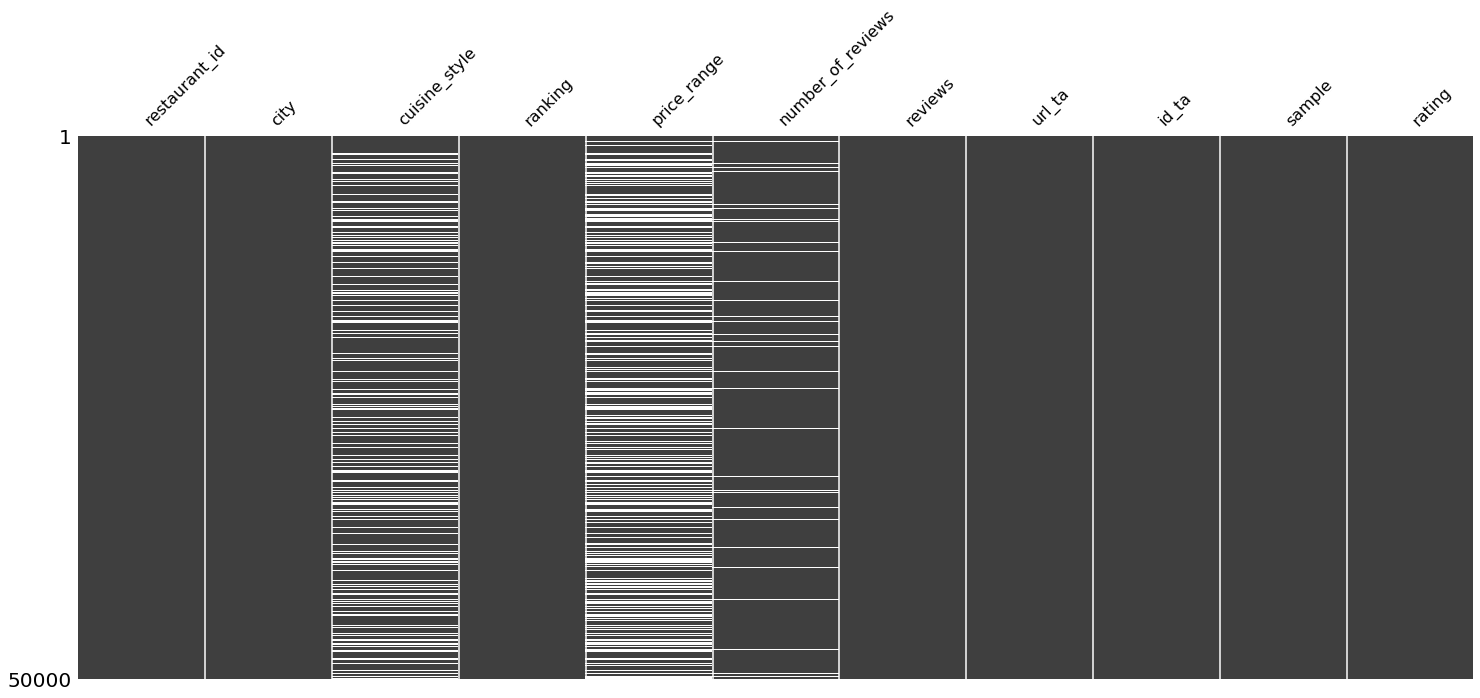

In [20]:
msno.matrix(data, sparkline=False)

#### Как видим, большинство признаков у нас требует очистки и предварительной обработки.

,missing_values,percent
price_range,17361,34.72
cuisine_style,11590,23.18
number_of_reviews,3200,6.40
reviews,2,0.00
restaurant_id,0,0.00
city,0,0.00
ranking,0,0.00
url_ta,0,0.00
id_ta,0,0.00
sample,0,0.00


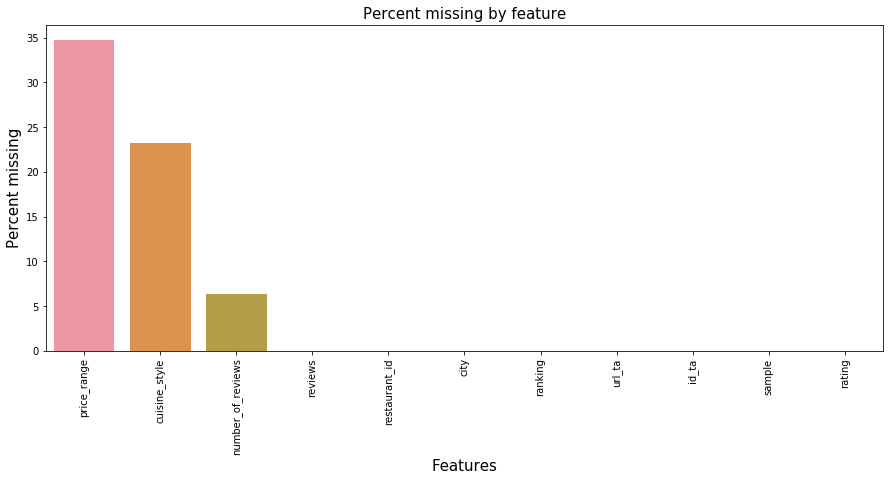

In [21]:
def na_checks(dataset):
    """Функция для визуализации пропусков в датасете"""
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = round((dataset.isnull().sum()/dataset.isnull().count()
                     ).sort_values(ascending=False)*100, 2)
    missing_data = pd.concat([total, percent], axis=1, keys=[
                             'missing_values', 'percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent missing', fontsize=15)
    plt.title('Percent missing by feature', fontsize=15)
    return missing_data

na_checks(data)

## Проверка на уникальность
Проверим полностью дублирующиеся строки



In [22]:
data.duplicated(subset=None, keep='first').value_counts()

False    50000
dtype: int64

Полностью дублирующихся строк нет.

Проверим отдельные поля датасета на наличие повторений и дубликатов

### 'restaurant_id'


In [23]:
len(data['restaurant_id'].value_counts().loc[lambda x : x > 1].index)


9287

Как видно есть повторяющиеся значения. Выясним, что они означают.

In [24]:
data['restaurant_id'].value_counts().loc[lambda x : x > 1].index[:20]

Index(['id_436', 'id_871', 'id_633', 'id_227', 'id_534', 'id_585', 'id_344',
       'id_71', 'id_321', 'id_430', 'id_482', 'id_367', 'id_561', 'id_245',
       'id_256', 'id_1076', 'id_792', 'id_107', 'id_589', 'id_364'],
      dtype='object')

In [25]:
data[data['restaurant_id'] == 'id_871'].sample(5)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating
15350,id_871,Krakow,"['Fast Food', 'European', 'Greek', 'Vegetarian...",872.0,$,98.0,"[['Good and Inexpensive!', 'Terrible service.'...",/Restaurant_Review-g274772-d1098630-Reviews-Ak...,d1098630,1,3.5
14275,id_871,Prague,"['Czech', 'European', 'Eastern European']",872.0,$,66.0,"[['Good food, reasonable prices, Czech beer t....",/Restaurant_Review-g274707-d4767690-Reviews-Re...,d4767690,1,4.5
30423,id_871,Munich,"['French', 'Mediterranean', 'European', 'Wine ...",879.0,$$$$,87.0,"[['I will go back next time when in Munich', '...",/Restaurant_Review-g187309-d1342532-Reviews-Le...,d1342532,1,4.5
49895,id_871,Oporto,"['Bar', 'European', 'Pub', 'Portuguese']",872.0,$,141.0,"[['Football on TV', 'Nice place for a glass of...",/Restaurant_Review-g189180-d7315906-Reviews-Cr...,d7315906,1,3.5
19209,id_871,Athens,NaN,873.0,NaN,9.0,"[['Crepexarchia', 'Filling and delicious food ...",/Restaurant_Review-g189400-d10110357-Reviews-C...,d10110357,1,4.5


Строки с одинаковым 'Restaurant_id' имеют различные, не повторяющиеся поля как городов, типов кухонь, так и идентификаторов ID_TA. Можно предположить, что это не ошибка данных,  скорее всего поле означает  не конкретный ресторан, а сеть  ресторанов или одного владельца.


### 'city'

In [26]:
data['city'].value_counts().sort_index(ascending=True)

Amsterdam     1372
Athens         776
Barcelona     3395
Berlin        2705
Bratislava     380
Brussels      1314
Budapest      1021
Copenhagen     819
Dublin         836
Edinburgh      745
Geneva         590
Hamburg       1186
Helsinki       475
Krakow         554
Lisbon        1647
Ljubljana      222
London        7193
Luxembourg     263
Lyon          1126
Madrid        3813
Milan         2694
Munich        1145
Oporto         642
Oslo           488
Paris         6108
Prague        1816
Rome          2589
Stockholm     1033
Vienna        1443
Warsaw         925
Zurich         685
Name: city, dtype: int64

In [27]:
cities_list = list(data['city'].value_counts().index)

C названиями городов все в порядке

## 'cuisine_style'

У данного признака присутствую пропуске в наборе данных.

Посмотрим более детально какие кухни преобладают в общей выборке и отдельно по городам.

In [28]:
data['cuisine_style'].value_counts(dropna=False).head(20)

NaN                             11590
['Italian']                      1332
['French']                       1019
['Spanish']                       860
['French', 'European']            503
['Cafe']                          500
['Pizza']                         454
['Italian', 'Pizza']              422
['Chinese']                       418
['European', 'Portuguese']        415
['Mediterranean']                 311
['Bar', 'Pub']                    307
['Mediterranean', 'Spanish']      293
['Vegetarian Friendly']           276
['Indian']                        270
['Fast Food']                     263
['International']                 247
['Japanese']                      247
['Italian', 'Mediterranean']      245
['European']                      245
Name: cuisine_style, dtype: int64

In [29]:
data[['city', 'cuisine_style']].groupby('city')['cuisine_style'].value_counts()['London'].head(10)

cuisine_style
['Bar', 'British', 'Pub']                           209
['British']                                         148
['Cafe']                                            122
['Indian']                                           99
['Italian']                                          93
['Bar', 'British', 'Pub', 'Vegetarian Friendly']     87
['Chinese']                                          75
['Chinese', 'Asian']                                 68
['Bar', 'Pub']                                       59
['Fast Food']                                        55
Name: cuisine_style, dtype: int64

In [30]:
data[['city', 'cuisine_style']].groupby('city')['cuisine_style'].value_counts()['London'].head(1).index[0]

"['Bar', 'British', 'Pub']"

Посчитаем количество встречающихся стилей кухонь в предлагаемых наборах стилей.

In [31]:
cuisine_dict = {}
styles_count = []
for style_set in data[data['cuisine_style'].notna()]['cuisine_style']:
    style_set_list = style_set.replace('"', '').replace('[', '').replace(']', '').replace("'", "").\
                    replace(', ', ',').split(',') 
    styles_count.append(len(style_set_list))
    for cuisine_style in style_set_list:
        if cuisine_style in cuisine_dict:
            cuisine_dict[cuisine_style] += 1
        else:
            cuisine_dict[cuisine_style] = 1
# max_value_style = max(cuisine_dict.values())
# top_cuisine_style = {k: v for k, v in cuisine_dict.items() if v == max_value_style}
# top_cuisine_style
sorted_cuisine_dict = {}
sorted_keys = sorted(cuisine_dict, key=cuisine_dict.get)  # [1, 3, 2]

for w in sorted_keys:
    sorted_cuisine_dict[w] = cuisine_dict[w]

sorted_cuisine_dict

{'Salvadoran': 1,
 'Xinjiang': 1,
 'Burmese': 1,
 'Latvian': 1,
 'Yunnan': 2,
 'Polynesian': 2,
 'Fujian': 2,
 'Welsh': 3,
 'Azerbaijani': 3,
 'Caucasian': 4,
 'Native American': 5,
 'Uzbek': 5,
 'Canadian': 7,
 'New Zealand': 7,
 'Ecuadorean': 8,
 'Albanian': 8,
 'Minority Chinese': 12,
 'Central Asian': 12,
 'Romanian': 13,
 'Chilean': 16,
 'Armenian': 17,
 'Filipino': 17,
 'Georgian': 18,
 'Mongolian': 20,
 'Ukrainian': 20,
 'Singaporean': 21,
 'Cambodian': 22,
 'Tunisian': 23,
 'Hawaiian': 23,
 'Southwestern': 24,
 'Egyptian': 24,
 'Afghani': 27,
 'Cajun & Creole': 27,
 'Tibetan': 29,
 'Colombian': 30,
 'Sri Lankan': 30,
 'Taiwanese': 30,
 'Cuban': 32,
 'Croatian': 33,
 'Australian': 36,
 'Jamaican': 36,
 'Malaysian': 38,
 'Ethiopian': 51,
 'Venezuelan': 51,
 'Kosher': 56,
 'Arabic': 58,
 'Russian': 66,
 'Indonesian': 71,
 'Persian': 77,
 'Slovenian': 85,
 'Israeli': 90,
 'Norwegian': 96,
 'Bangladeshi': 100,
 'Balti': 104,
 'Nepali': 121,
 'Caribbean': 124,
 'Peruvian': 130,
 'Pak

## Мой метод парсинга cusine_style

In [32]:
df_cuisine = data['cuisine_style']

In [33]:
df_cuisine.to_frame(name='cuisine_style')

,cuisine_style
0,"['Bar', 'Pub']"
1,"['European', 'Scandinavian', 'Gluten Free Opti..."
2,['Vegetarian Friendly']
3,"['Italian', 'Mediterranean', 'European', 'Vege..."
4,"['Italian', 'Mediterranean', 'European', 'Seaf..."
...,...
49995,"['Italian', 'Vegetarian Friendly', 'Vegan Opti..."
49996,"['French', 'American', 'Bar', 'European', 'Veg..."
49997,"['Japanese', 'Sushi']"
49998,"['Polish', 'European', 'Eastern European', 'Ce..."


In [34]:
df_cuisine = df_cuisine.dropna()
df_cuisine

0                                           ['Bar', 'Pub']
1        ['European', 'Scandinavian', 'Gluten Free Opti...
2                                  ['Vegetarian Friendly']
3        ['Italian', 'Mediterranean', 'European', 'Vege...
4        ['Italian', 'Mediterranean', 'European', 'Seaf...
                               ...                        
49995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
49996    ['French', 'American', 'Bar', 'European', 'Veg...
49997                                ['Japanese', 'Sushi']
49998    ['Polish', 'European', 'Eastern European', 'Ce...
49999                                          ['Spanish']
Name: cuisine_style, Length: 38410, dtype: object

In [35]:
list_cuisine = []
for row in df_cuisine:
    time_list = (ast.literal_eval(row))
    for words in time_list:
        list_cuisine.append(words)

list_cuisine

['Bar',
 'Pub',
 'European',
 'Scandinavian',
 'Gluten Free Options',
 'Vegetarian Friendly',
 'Vegan Options',
 'Vegetarian Friendly',
 'Italian',
 'Mediterranean',
 'European',
 'Vegetarian Friendly',
 'Gluten Free Options',
 'Italian',
 'Mediterranean',
 'European',
 'Seafood',
 'Vegetarian Friendly',
 'Gluten Free Options',
 'French',
 'Cafe',
 'Fast Food',
 'European',
 'Portuguese',
 'European',
 'Scandinavian',
 'Italian',
 'Italian',
 'Greek',
 'European',
 'Czech',
 'Eastern European',
 'Central European',
 'French',
 'Pizza',
 'Vegetarian Friendly',
 'Vegan Options',
 'Bar',
 'British',
 'Pub',
 'Vegetarian Friendly',
 'Gluten Free Options',
 'Italian',
 'Pizza',
 'European',
 'Gluten Free Options',
 'Vegetarian Friendly',
 'Bar',
 'Pizza',
 'British',
 'Vegetarian Friendly',
 'Vegan Options',
 'Mediterranean',
 'Spanish',
 'Vegetarian Friendly',
 'Italian',
 'Mediterranean',
 'Pizza',
 'Spanish',
 'Vegetarian Friendly',
 'Italian',
 'Mediterranean',
 'Vegetarian Friendly',
 

В общем, 119_676 кухонь в дате

In [36]:
len(list_cuisine)

119676

125 уникальных кухонь

In [37]:
len(set(list_cuisine))

125

In [38]:
cuisine_dict = {}
set_cuisine = set(list_cuisine)

for cuisine in set_cuisine:
    cuisine_dict[cuisine] = 0
cuisine_dict

for word in list_cuisine:
    cuisine_dict[word] += 1

cuisine_dict

{'Halal': 773,
 'Cuban': 32,
 'Street Food': 336,
 'Fusion': 748,
 'Tibetan': 29,
 'Egyptian': 24,
 'Contemporary': 652,
 'Romanian': 13,
 'Southwestern': 24,
 'Japanese': 1860,
 'Norwegian': 96,
 'Cambodian': 22,
 'Minority Chinese': 12,
 'New Zealand': 7,
 'Czech': 745,
 'Venezuelan': 51,
 'Fast Food': 2122,
 'Armenian': 17,
 'Turkish': 574,
 'Cafe': 2883,
 'South American': 490,
 'Azerbaijani': 3,
 'European': 12561,
 'Chilean': 16,
 'Thai': 923,
 'Indonesian': 71,
 'Dutch': 368,
 'Argentinean': 214,
 'Taiwanese': 30,
 'Yunnan': 2,
 'Steakhouse': 729,
 'Ecuadorean': 8,
 'Moroccan': 173,
 'Asian': 3786,
 'Polish': 453,
 'Diner': 375,
 'Vegetarian Friendly': 14021,
 'Bar': 4094,
 'Welsh': 3,
 'Salvadoran': 1,
 'Grill': 617,
 'Soups': 630,
 'Filipino': 17,
 'Australian': 36,
 'Fujian': 2,
 'Gastropub': 608,
 'Swedish': 223,
 'Tunisian': 23,
 'Hungarian': 444,
 'Sushi': 1450,
 'Scandinavian': 449,
 'Ukrainian': 20,
 'Croatian': 33,
 'Singaporean': 21,
 'Sri Lankan': 30,
 'Wine Bar': 877

In [39]:
max(cuisine_dict.values())

14021

In [40]:
print({key: value for key, value in sorted(cuisine_dict.items(), key=lambda item: item[1])})

{'Salvadoran': 1, 'Latvian': 1, 'Xinjiang': 1, 'Burmese': 1, 'Yunnan': 2, 'Fujian': 2, 'Polynesian': 2, 'Azerbaijani': 3, 'Welsh': 3, 'Caucasian': 4, 'Native American': 5, 'Uzbek': 5, 'New Zealand': 7, 'Canadian': 7, 'Ecuadorean': 8, 'Albanian': 8, 'Minority Chinese': 12, 'Central Asian': 12, 'Romanian': 13, 'Chilean': 16, 'Armenian': 17, 'Filipino': 17, 'Georgian': 18, 'Ukrainian': 20, 'Mongolian': 20, 'Singaporean': 21, 'Cambodian': 22, 'Tunisian': 23, 'Hawaiian': 23, 'Egyptian': 24, 'Southwestern': 24, 'Afghani': 27, 'Cajun & Creole': 27, 'Tibetan': 29, 'Taiwanese': 30, 'Sri Lankan': 30, 'Colombian': 30, 'Cuban': 32, 'Croatian': 33, 'Australian': 36, 'Jamaican': 36, 'Malaysian': 38, 'Venezuelan': 51, 'Ethiopian': 51, 'Kosher': 56, 'Arabic': 58, 'Russian': 66, 'Indonesian': 71, 'Persian': 77, 'Slovenian': 85, 'Israeli': 90, 'Norwegian': 96, 'Bangladeshi': 100, 'Balti': 104, 'Nepali': 121, 'Caribbean': 124, 'Peruvian': 130, 'Pakistani': 140, 'Brazilian': 152, 'Central American': 168, 

Самая популярная кухня - 'Vegetarian Friendly': 14021

## 'price_range'

In [41]:
data['price_range'].value_counts(dropna=False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: price_range, dtype: int64

In [42]:
data[['city', 'price_range']].groupby('city').describe

<bound method GroupBy.describe of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002AE43DED488>>

Как видно ценовой диапазон, что в общей выборке, что по городам в основном средний '\$\$ \- \$\\$\\$'.

## 'number_of_reviews'

In [43]:
data['number_of_reviews'].value_counts(dropna=False)

NaN       3200
2.0       2403
3.0       2042
4.0       1707
5.0       1471
          ... 
1572.0       1
941.0        1
1807.0       1
1108.0       1
1045.0       1
Name: number_of_reviews, Length: 1574, dtype: int64

In [44]:
data['number_of_reviews'].describe()

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: number_of_reviews, dtype: float64

In [45]:
data[data['number_of_reviews'] > 5000 ]

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating
1369,id_1369,Rome,"['Pizza', 'Italian', 'Vegetarian Friendly', 'V...",95.0,$$ - $$$,5037.0,[['Best dinner we had in Italy and in our ent....,/Restaurant_Review-g187791-d3666269-Reviews-Da...,d3666269,0,0.0
2550,id_2550,London,"['British', 'French', 'European', 'Vegetarian ...",274.0,$$$$,5011.0,"[['Lovely chilled lunch', 'Birthday Lunch'], [...",/Restaurant_Review-g186338-d776287-Reviews-The...,d776287,0,0.0
5295,id_5295,Brussels,"['French', 'Belgian', 'Seafood', 'European']",189.0,$$ - $$$,6437.0,"[['Interesting restaurant, not sure of the fu....",/Restaurant_Review-g188644-d694788-Reviews-Che...,d694788,0,0.0
14817,id_144,Rome,"['Italian', 'Mediterranean', 'European', 'Vege...",145.0,$$ - $$$,5927.0,"[['Incredible food!', 'That is a more :-)'], [...",/Restaurant_Review-g187791-d1207928-Reviews-Th...,d1207928,1,4.5
15717,id_559,London,"['Chinese', 'Asian', 'Vegetarian Friendly', 'V...",560.0,$$$$,5216.0,[['You go for the view and are surprised by t....,/Restaurant_Review-g186338-d4346684-Reviews-Hu...,d4346684,1,4.0
18516,id_266,Amsterdam,"['Barbecue', 'American', 'Vegetarian Friendly'...",267.0,$$ - $$$,6777.0,"[['Love ! Food and cocktails amazing!', 'As al...",/Restaurant_Review-g188590-d1010937-Reviews-Ha...,d1010937,1,4.0
25779,id_430,Paris,"['French', 'European', 'Contemporary', 'Vegeta...",431.0,$$$$,7622.0,"[['This night is not about the meal, it is ab....",/Restaurant_Review-g187147-d736855-Reviews-58_...,d736855,1,4.0
26433,id_12,Budapest,"['Hungarian', 'Vegetarian Friendly', 'Vegan Op...",13.0,$$ - $$$,7575.0,"[['Traditional food, all local and great', 'Co...",/Restaurant_Review-g274887-d3351231-Reviews-Hu...,d3351231,1,4.5
28450,id_324,Madrid,"['Bar', 'Mediterranean', 'European', 'Spanish']",325.0,$,6013.0,"[['Good bar and menu options', 'Ham Museum is ...",/Restaurant_Review-g187514-d1737081-Reviews-Mu...,d1737081,1,4.0
29251,id_375,London,"['British', 'Vegetarian Friendly', 'Gluten Fre...",376.0,$$$$,9660.0,"[['Lovely setting and decent food', 'A Christm...",/Restaurant_Review-g186338-d1421189-Reviews-Lo...,d1421189,1,4.0


In [46]:
data[['city', 'number_of_reviews']].groupby('city').describe

<bound method GroupBy.describe of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002AE431E8F08>>

## 'reviews'

In [47]:
len(data['reviews'].value_counts().loc[lambda x : x > 1])

31

In [48]:
data['reviews'].value_counts().loc[lambda x : x > 1]

[[], []]                                                                                                                              8112
[['Delicious soup', 'My weekly treat'], ['03/19/2017', '07/30/2017']]                                                                    2
[['Sat night', 'Can\'t even explain.. "A" place.. A "100...'], ['10/22/2017', '05/11/2017']]                                             2
[['Good restaurant for one meal.', 'Olive Garden Restaurant Warsaw. Food very...'], ['04/20/2015', '07/15/2013']]                        2
[['Good Lebanese food', 'Decent place'], ['07/19/2017', '03/17/2017']]                                                                   2
[['Whenever in Madrid, we never miss this gem...', 'Underrated sushi restaurant with very good...'], ['04/11/2017', '12/02/2016']]       2
[['ok for beer, not for dinner'], ['12/20/2017']]                                                                                        2
[['Absolutely authentic and

В датасете встречаются дублированные отзывы. Количество повторов не более двух. Также 8112 записей с пустыми отзывами

## url_ta


In [49]:
data['url_ta'].value_counts().loc[lambda x : x > 1]

/Restaurant_Review-g187514-d1315077-Reviews-El_Pimiento_Verde-Madrid.html                                           2
/Restaurant_Review-g187514-d13002276-Reviews-Delish_Vegan_Doughnuts-Madrid.html                                     2
/Restaurant_Review-g187514-d3647024-Reviews-La_Zamorana-Madrid.html                                                 2
/Restaurant_Review-g187514-d697406-Reviews-Al_Mounia-Madrid.html                                                    2
/Restaurant_Review-g187514-d10047799-Reviews-Entrepuntos-Madrid.html                                                2
/Restaurant_Review-g187514-d4748208-Reviews-Restaurante_Te_Oriental-Madrid.html                                     2
/Restaurant_Review-g187514-d2360290-Reviews-Lounge_Yi-Madrid.html                                                   2
/Restaurant_Review-g187514-d2669414-Reviews-Vips-Madrid.html                                                        2
/Restaurant_Review-g187514-d4914988-Reviews-Xiang_Asia_R

In [50]:
len(data['url_ta'].value_counts().loc[lambda x : x > 1])

37

In [51]:
data['id_ta'].value_counts().loc[lambda x : x > 1]

d987900      2
d4600226     2
d2360290     2
d1315077     2
d8753348     2
d1235635     2
d4914988     2
d5618007     2
d10316215    2
d7809594     2
d5617412     2
d4748208     2
d10440367    2
d13002276    2
d3396817     2
d10047799    2
d11674463    2
d9802625     2
d11698990    2
d2669414     2
d2010743     2
d9877640     2
d1568045     2
d3685055     2
d3647024     2
d3161682     2
d3748757     2
d11999956    2
d7342803     2
d1028622     2
d793170      2
d7337366     2
d697406      2
d2477531     2
d12488993    2
d11921719    2
d7827387     2
Name: id_ta, dtype: int64

In [52]:
len(data['id_ta'].value_counts().loc[lambda x : x > 1])

37

Дублируются идентификаторы ресторана в базе данных TripAdvisor

In [53]:
print(data[data['id_ta'] == 'd1028622']['reviews'])

4534     [['Visited the rooftop bar', 'SIXTH FLOOR ROOF...
28388    [['Visited the rooftop bar', 'SIXTH FLOOR ROOF...
Name: reviews, dtype: object


In [54]:
data[data['id_ta'] == 'd1028622']

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating
4534,id_4534,Madrid,"['Bar', 'European', 'Spanish', 'Delicatessen']",1253.0,$$$$,116.0,"[['Visited the rooftop bar', 'SIXTH FLOOR ROOF...",/Restaurant_Review-g187514-d1028622-Reviews-La...,d1028622,0,0.0
28388,id_1229,Madrid,"['Bar', 'European', 'Spanish', 'Delicatessen']",1231.0,$$$$,116.0,"[['Visited the rooftop bar', 'SIXTH FLOOR ROOF...",/Restaurant_Review-g187514-d1028622-Reviews-La...,d1028622,1,4.0


## 4. Обработка неизвестных значений NaN и создание новых признаков. 


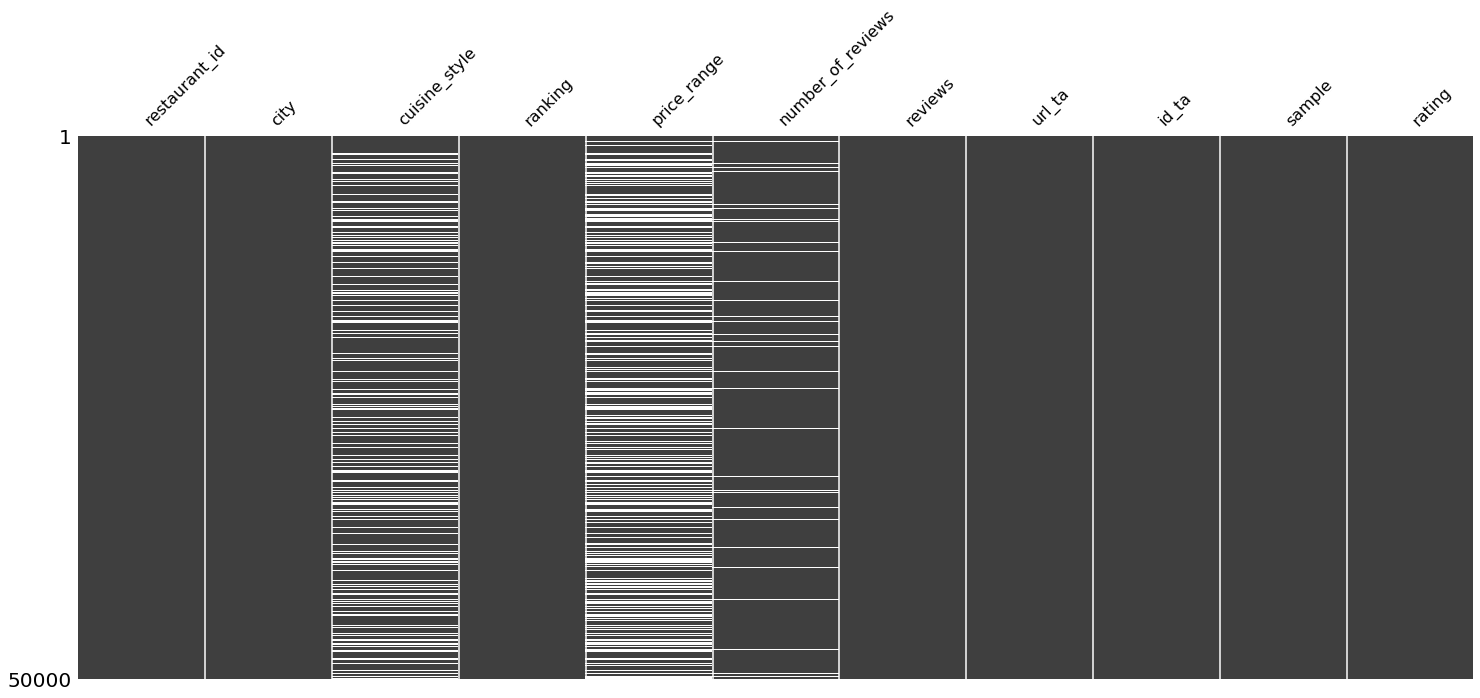

In [55]:
msno.matrix(data, sparkline=False)

In [56]:
cols_with_nans = (data.isnull().any()[lambda column: column]).index
cols_with_nans

Index(['cuisine_style', 'price_range', 'number_of_reviews', 'reviews'], dtype='object')

Cоздаем признаки с пропущенными данными (0, 1):

- number_of_reviews_isNAN
- cuisine_style_isNAN
- price_range_isNAN
- reviwes_isNAN

In [57]:
data['number_of_reviews_isNAN'] = pd.isna(data['number_of_reviews']).astype('uint8')
data['cuisine_style_isNAN'] = pd.isna(data['cuisine_style']).astype('uint8')
data['price_range_isNAN'] = pd.isna(data['price_range']).astype('uint8')
data['reviwes_isNAN'] = pd.isna(data['reviews']).astype('uint8')
data.sample(10)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,number_of_reviews_isNAN,cuisine_style_isNAN,price_range_isNAN,reviwes_isNAN
543,id_543,Barcelona,"['Mediterranean', 'European', 'Spanish', 'Vege...",526.0,$$ - $$$,1490.0,"[['Nice', 'Good catalan cuisine'], ['12/30/201...",/Restaurant_Review-g187497-d717406-Reviews-Sen...,d717406,0,0.0,0,0,0,0
37156,id_12916,London,['Pizza'],12926.0,$,5.0,"[['Fab cheap lunch time deals', 'SO CHEAP, SO ...",/Restaurant_Review-g186338-d7322095-Reviews-Pi...,d7322095,1,4.0,0,0,0,0
16442,id_1244,Oporto,NaN,1245.0,NaN,2.0,"[[], []]",/Restaurant_Review-g189180-d5977635-Reviews-Ba...,d5977635,1,4.0,0,1,1,0
26408,id_2296,Milan,"['Italian', 'Pizza', 'Mediterranean', 'Vegetar...",2298.0,$$ - $$$,94.0,"[['Good pizza and fair price', 'Very impressed...",/Restaurant_Review-g187849-d10173785-Reviews-V...,d10173785,1,3.5,0,0,0,0
48683,id_7825,Paris,['Vegetarian Friendly'],7826.0,$,12.0,"[['Mixed Experience'], ['10/16/2016']]",/Restaurant_Review-g187147-d10165888-Reviews-L...,d10165888,1,4.0,0,0,0,0
49979,id_7068,London,"['Bar', 'British', 'Pub']",7077.0,$$ - $$$,41.0,"[['Great place !', 'Surprised by this hole in ...",/Restaurant_Review-g186338-d6373401-Reviews-Th...,d6373401,1,4.0,0,0,0,0
48059,id_1174,Stockholm,['Cafe'],1175.0,NaN,5.0,"[['Favorite place!'], ['08/23/2016']]",/Restaurant_Review-g189852-d8704187-Reviews-Va...,d8704187,1,4.5,0,0,1,0
14317,id_783,Budapest,"['Italian', 'European', 'Mediterranean', 'Vege...",784.0,$$ - $$$,64.0,"[['Special Request are Granted', 'Good food, n...",/Restaurant_Review-g274887-d5985971-Reviews-TG...,d5985971,1,4.0,0,0,0,0
42212,id_14022,London,['American'],14032.0,$$ - $$$,2.0,"[['been for a snack... stylish...', 'Good cock...",/Restaurant_Review-g186338-d734001-Reviews-DKN...,d734001,1,3.5,0,0,0,0
10062,id_3662,Barcelona,['Spanish'],3663.0,$,26.0,"[['Great.', 'Nice'], ['08/31/2016', '05/17/201...",/Restaurant_Review-g187497-d5587837-Reviews-Ch...,d5587837,1,4.0,0,0,0,0


### Загружаем новую дату с kaggles: concap.csv

In [58]:
capitals = pd.read_csv('concap.csv')
capitals

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe
...,...,...,...,...,...,...
240,Northern Cyprus,North Nicosia,35.183333,33.366667,NaN,Europe
241,Hong Kong,NaN,0.000000,0.000000,HK,Asia
242,Heard Island and McDonald Islands,NaN,0.000000,0.000000,HM,Antarctica
243,British Indian Ocean Territory,Diego Garcia,-7.300000,72.400000,IO,Africa


Нам нужны столбцы 'country', 'capital'

In [59]:
capitals = capitals[['CountryName', 'CapitalName']]
capitals.columns = ['country', 'capital']
capitals = capitals.set_index('country')
capitals.index = capitals.index.str.strip()
capitals.sample(20)

,capital
country,
Tunisia,Tunis
New Caledonia,Noumea
Federated States of Micronesia,Palikir
Bulgaria,Sofia
Liechtenstein,Vaduz
Finland,Helsinki
Chile,Santiago
South Sudan,Juba
Solomon Islands,Honiara


### Загружаем новую дату с kaggles - worldcities.csv

Загружаем столбцы 'city', 'country', 'population'

In [60]:
cities = pd.read_csv('worldcities.csv')
cities = cities[['city', 'country', 'population']].copy().set_index('city')
cities.sample(10)

,country,population
city,,
Stavropol’,Russia,363064.0
Kobarid,Slovenia,NaN
Blacksburg,United States,92573.0
Standish,United States,10091.0
Kokomo,United States,79099.0
Komsomol’sk-na-Amure,Russia,275908.0
Mercer Island,United States,25261.0
San Leandro,United States,90553.0
Kupiškis,Lithuania,NaN


### Загружаем новую дату с kaggles - countries of the world.csv

Здесь много интересных столбцов с данными как: ('Coastline (coast/area ratio)', 'GDP ($ per capita)', 'Phones (per 1000)', 'Agriculture', 'Service')

In [61]:
countries = pd.read_csv('countries of the world.csv')
countries = countries[[
    'Country',
    'Coastline (coast/area ratio)',
    'GDP ($ per capita)',
    'Phones (per 1000)',
    'Agriculture',
    'Service'
]].copy()
countries.columns = ['country', 'coastline', 'gdp', 'phones', 'agriculture', 'service']
countries = countries.set_index('country')
countries.index = countries.index.str.strip()
countries.sample(10)

,coastline,gdp,phones,agriculture,service
country,,,,,
"Korea, North","2,07",1300.0,"42,4","0,3","0,36"
Burma,"0,28",1800.0,"10,1","0,564","0,353"
Qatar,"4,92",21500.0,"232,0","0,002","0,197"
Liechtenstein,"0,00",25000.0,"585,5","0,06","0,55"
Mongolia,"0,00",1800.0,"55,1","0,206","0,58"
Togo,"0,10",1500.0,"10,6","0,395","0,401"
Italy,"2,52",26700.0,"430,9","0,021","0,688"
Tuvalu,"92,31",1100.0,"59,3","0,166","0,562"
Reunion,"8,22",5800.0,"380,9","0,08","0,73"


### Парсинг столбца reviews:

In [62]:
def extract_dates(x):
    pattern = re.compile('\d{2}/\d{2}/\d{4}')
    return pattern.findall(str(x))


data['reviews'] = data['reviews'].fillna(0)
data['review_dates'] = data['reviews'].apply(lambda x: extract_dates(x))

# Сразу выведем к-во дат = к-во отзывов, так как было замечено, что иногда отзыв только один:
data['dates_count'] = data['review_dates'].apply(lambda x: len(x))

In [63]:
data

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,number_of_reviews_isNAN,cuisine_style_isNAN,price_range_isNAN,reviwes_isNAN,review_dates,dates_count
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,0,0,[],0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,0,0,"[12/05/2017, 10/29/2017]",2
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,0,0,"[12/28/2017, 12/06/2017]",2
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0,0,0,"[12/06/2017, 11/22/2017]",2
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,0,0,"[02/08/2018, 01/24/2018]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,0,0,0,0,"[12/16/2017, 11/12/2017]",2
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,0,0,0,0,"[12/21/2017, 12/12/2017]",2
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,0,0,1,0,"[11/03/2016, 04/12/2008]",2
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,0,0,0,0,"[07/11/2017, 06/18/2017]",2


In [64]:
def review_date(x, date='latest'):
    '''функция для отбора даты по значению'''
    if len(x) == 0:
        return 'NaN'
    elif len(x) == 1:
        return x[0]
    elif len(x) == 2:
        date_1 = x[0]
        date_2 = x[1]
        latest = max(date_1, date_2)
        earliest = min(date_1, date_2)
        if date == 'latest':
            return latest
        else:
            return earliest            
        
data['latest_date'] = pd.to_datetime(data['review_dates'].apply(lambda x: review_date(x,'latest')))
data['earliest_date'] = pd.to_datetime(data['review_dates'].apply(lambda x: review_date(x, date='earliest')))

In [65]:
data

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,number_of_reviews_isNAN,cuisine_style_isNAN,price_range_isNAN,reviwes_isNAN,review_dates,dates_count,latest_date,earliest_date
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,0,0,[],0,NaT,NaT
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,0,0,"[12/05/2017, 10/29/2017]",2,2017-12-05,2017-10-29
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,0,0,"[12/28/2017, 12/06/2017]",2,2017-12-28,2017-12-06
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0,0,0,"[12/06/2017, 11/22/2017]",2,2017-12-06,2017-11-22
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,0,0,"[02/08/2018, 01/24/2018]",2,2018-02-08,2018-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,0,0,0,0,"[12/16/2017, 11/12/2017]",2,2017-12-16,2017-11-12
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,0,0,0,0,"[12/21/2017, 12/12/2017]",2,2017-12-21,2017-12-12
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,0,0,1,0,"[11/03/2016, 04/12/2008]",2,2016-11-03,2008-04-12
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,0,0,0,0,"[07/11/2017, 06/18/2017]",2,2017-07-11,2017-06-18


In [66]:
data['earliest_date'] = data['earliest_date'].fillna(data['earliest_date'].min())
data['latest_date'] = data['latest_date'].fillna(data['latest_date'].min())

Посчитаем разницу между первым и последним отзывом и создадим соответствующий признак

In [67]:
data['days_btw_reviews'] = data['latest_date'] - data['earliest_date']
data['days_btw_reviews'] = data['days_btw_reviews'].apply(lambda x: x.days)

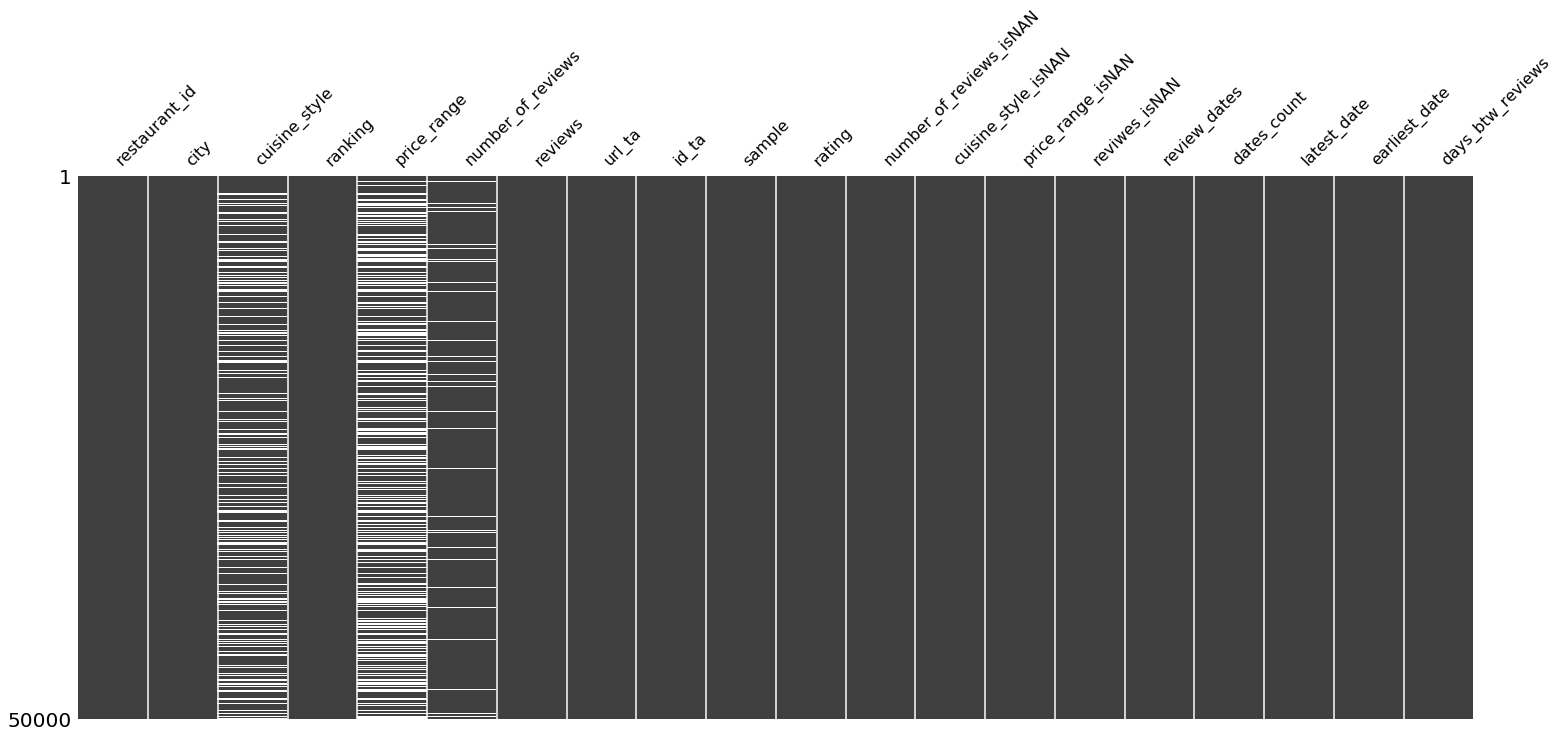

In [68]:
msno.matrix(data, sparkline=False)

### Новый признак Country

In [69]:
data['country'] = pd.Series(np.array([None] * data.shape[0]))

for name in data.city.unique():
    if name in cities.index:
        try:
            data.loc[(data.city == name), 'country'] = cities.loc[name].country
        except:
            data.loc[(data.city == name), 'country'] = cities.loc[name].country.values[0]

In [70]:
data.country.isnull().value_counts()

False    48119
True      1881
Name: country, dtype: int64

In [71]:
data.loc[(data.city == 'Oporto'), 'country'] = 'Portugal'
data.loc[(data.city == 'Zurich'), 'country'] = 'Switzerland'
data.loc[(data.city == 'Krakow'), 'country'] = 'Poland'

data.country.isnull().value_counts()

False    50000
Name: country, dtype: int64

In [72]:
data.columns

Index(['restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range',
       'number_of_reviews', 'reviews', 'url_ta', 'id_ta', 'sample', 'rating',
       'number_of_reviews_isNAN', 'cuisine_style_isNAN', 'price_range_isNAN',
       'reviwes_isNAN', 'review_dates', 'dates_count', 'latest_date',
       'earliest_date', 'days_btw_reviews', 'country'],
      dtype='object')

In [73]:
data.head(10)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,number_of_reviews_isNAN,cuisine_style_isNAN,price_range_isNAN,reviwes_isNAN,review_dates,dates_count,latest_date,earliest_date,days_btw_reviews,country
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,0,[],0,2004-04-21,2004-04-21,0,France
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,"[12/05/2017, 10/29/2017]",2,2017-12-05,2017-10-29,37,Finland
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,"[12/28/2017, 12/06/2017]",2,2017-12-28,2017-12-06,22,United Kingdom
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,"[12/06/2017, 11/22/2017]",2,2017-12-06,2017-11-22,14,United Kingdom
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,"[02/08/2018, 01/24/2018]",2,2018-02-08,2018-01-24,15,Slovakia
5,id_5,Paris,"['French', 'Cafe', 'Fast Food']",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,...,0,0,0,0,"[09/07/2017, 09/02/2017]",2,2017-09-07,2017-09-02,5,France
6,id_6,Lisbon,"['European', 'Portuguese']",3704.0,$,2.0,"[[], []]",/Restaurant_Review-g189158-d8758873-Reviews-Li...,d8758873,0,...,0,0,0,0,[],0,2004-04-21,2004-04-21,0,Portugal
7,id_7,Budapest,NaN,2330.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,...,1,1,1,0,[],0,2004-04-21,2004-04-21,0,Hungary
8,id_8,Helsinki,"['European', 'Scandinavian']",771.0,NaN,2.0,"[['Big group supper', 'Good food but very slow...",/Restaurant_Review-g189934-d12947542-Reviews-B...,d12947542,0,...,0,0,1,0,"[01/07/2018, 10/11/2017]",2,2017-10-11,2018-01-07,-88,Finland
9,id_9,Stockholm,['Italian'],605.0,NaN,13.0,"[['Good food', 'Good pizza'], ['12/02/2017', '...",/Restaurant_Review-g189852-d12716384-Reviews-I...,d12716384,0,...,0,0,1,0,"[12/02/2017, 10/29/2017]",2,2017-12-02,2017-10-29,34,Sweden


### Обработка и заполнение number_of_reviews

В начале хотел заполнить пустые значения средним от общей выборки (в генеральной совокупности) - data.number_of_reviews.mean()

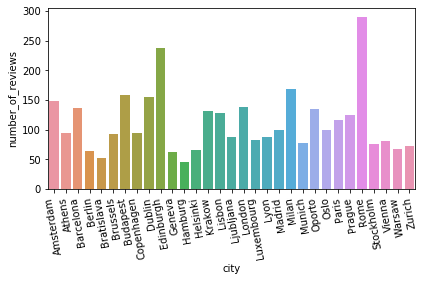

In [74]:
average_reviews_per_city = data.groupby('city')['number_of_reviews'].mean().reset_index()
sns.barplot(x = 'city', y = 'number_of_reviews', data = average_reviews_per_city)
plt.xticks(rotation=100)
plt.tight_layout()

Заполняем столбец number_of_reviews средним по каждому городу

In [75]:
dict_reviews = data.groupby('city')['number_of_reviews'].mean().to_dict()
data['number_of_reviews'] = data['number_of_reviews'].fillna(data['city'].map(dict_reviews))

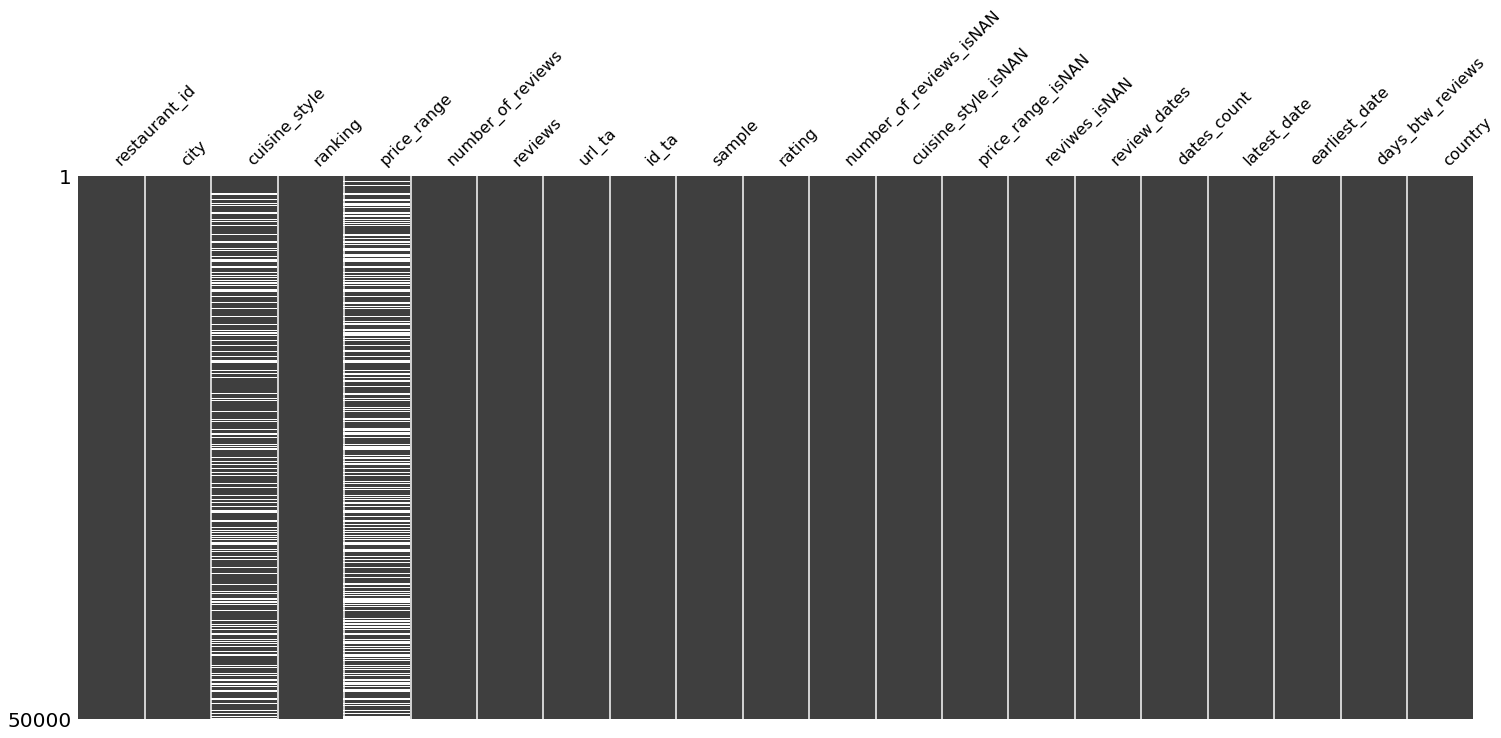

In [76]:
msno.matrix(data, sparkline=False)

Можем удалить number_of_reviews_isNAN, так как у нас уже данные по этому столбцу заполнены

In [77]:
del data['number_of_reviews_isNAN']

In [78]:
data.columns

Index(['restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range',
       'number_of_reviews', 'reviews', 'url_ta', 'id_ta', 'sample', 'rating',
       'cuisine_style_isNAN', 'price_range_isNAN', 'reviwes_isNAN',
       'review_dates', 'dates_count', 'latest_date', 'earliest_date',
       'days_btw_reviews', 'country'],
      dtype='object')

### Обработка и заполненение cusine_style

In [79]:
data['cuisine_style'].value_counts()

['Italian']                                                                      1332
['French']                                                                       1019
['Spanish']                                                                       860
['French', 'European']                                                            503
['Cafe']                                                                          500
                                                                                 ... 
['French', 'Irish', 'European', 'Vegetarian Friendly', 'Gluten Free Options']       1
['International', 'Spanish', 'Wine Bar']                                            1
['Cafe', 'Delicatessen', 'Wine Bar', 'Gluten Free Options']                         1
['American', 'Cafe', 'Fast Food', 'Grill', 'Fusion']                                1
['Delicatessen', 'Eastern European']                                                1
Name: cuisine_style, Length: 10731, dtype: int64

In [80]:
stats = data['cuisine_style'].isnull().value_counts()
print(stats)
print(100 * stats[1] / (stats[0] + stats[1]))

False    38410
True     11590
Name: cuisine_style, dtype: int64
23.18


In [81]:
cuisine_dict

{'Halal': 773,
 'Cuban': 32,
 'Street Food': 336,
 'Fusion': 748,
 'Tibetan': 29,
 'Egyptian': 24,
 'Contemporary': 652,
 'Romanian': 13,
 'Southwestern': 24,
 'Japanese': 1860,
 'Norwegian': 96,
 'Cambodian': 22,
 'Minority Chinese': 12,
 'New Zealand': 7,
 'Czech': 745,
 'Venezuelan': 51,
 'Fast Food': 2122,
 'Armenian': 17,
 'Turkish': 574,
 'Cafe': 2883,
 'South American': 490,
 'Azerbaijani': 3,
 'European': 12561,
 'Chilean': 16,
 'Thai': 923,
 'Indonesian': 71,
 'Dutch': 368,
 'Argentinean': 214,
 'Taiwanese': 30,
 'Yunnan': 2,
 'Steakhouse': 729,
 'Ecuadorean': 8,
 'Moroccan': 173,
 'Asian': 3786,
 'Polish': 453,
 'Diner': 375,
 'Vegetarian Friendly': 14021,
 'Bar': 4094,
 'Welsh': 3,
 'Salvadoran': 1,
 'Grill': 617,
 'Soups': 630,
 'Filipino': 17,
 'Australian': 36,
 'Fujian': 2,
 'Gastropub': 608,
 'Swedish': 223,
 'Tunisian': 23,
 'Hungarian': 444,
 'Sushi': 1450,
 'Scandinavian': 449,
 'Ukrainian': 20,
 'Croatian': 33,
 'Singaporean': 21,
 'Sri Lankan': 30,
 'Wine Bar': 877

In [82]:
def convert(x):
#Функция для очистки Cuisine Style
    if type(x) == int:
        res = []
        return res
    else:
        pattern = re.compile('[a-zA-Z ]{2,}')
        x = pattern.findall(x)
        return x
    
    
data['cuisine_style'] = data['cuisine_style'].fillna(0)
data['cuisine_style'] = data['cuisine_style'].apply(lambda x: convert(x))

In [83]:
data_cuisine = data.copy()
data_cuisine = data_cuisine.explode('cuisine_style')

In [84]:
data['cuisine_count'] = data['cuisine_style'].apply(lambda x: 1 if len(x)==0 else len(x))
data['cuisine_count'].mean()

2.62586

In [85]:
avg_cusines_per_city = data.groupby('city')['cuisine_count'].mean().sort_values(ascending=False)
print(avg_cusines_per_city)

city
Edinburgh     3.734228
Ljubljana     3.405405
Amsterdam     3.322157
Dublin        3.320574
Budapest      3.278159
Rome          3.195056
Krakow        3.138989
Oslo          3.086066
Zurich        3.010219
London        2.969971
Prague        2.854075
Vienna        2.742897
Luxembourg    2.741445
Oporto        2.721184
Copenhagen    2.705739
Barcelona     2.679234
Lisbon        2.656345
Helsinki      2.627368
Athens        2.613402
Geneva        2.600000
Warsaw        2.566486
Stockholm     2.512101
Brussels      2.503044
Milan         2.477728
Munich        2.459389
Berlin        2.277264
Bratislava    2.228947
Paris         2.144073
Madrid        2.106740
Hamburg       1.936762
Lyon          1.637655
Name: cuisine_count, dtype: float64


In [86]:
avg_cusines_per_country = data.groupby('country')['cuisine_count'].mean().sort_values(ascending=False)
print(avg_cusines_per_country)

country
Slovenia          3.405405
Netherlands       3.322157
Ireland           3.320574
Hungary           3.278159
Norway            3.086066
United Kingdom    3.041698
Czechia           2.854075
Italy             2.829264
Switzerland       2.820392
Poland            2.780933
Austria           2.742897
Luxembourg        2.741445
Denmark           2.705739
Portugal          2.674530
Finland           2.627368
Greece            2.613402
Sweden            2.512101
Belgium           2.503044
Spain             2.376387
Germany           2.238483
Slovakia          2.228947
France            2.065247
Name: cuisine_count, dtype: float64


Решил взять по признаку - city

In [87]:
avg_cuisines_per_city_dict = avg_cusines_per_city.to_dict()
data['avg_cuisine_count'] = data['city'].map(avg_cuisines_per_city_dict)

In [88]:
data

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,price_range_isNAN,reviwes_isNAN,review_dates,dates_count,latest_date,earliest_date,days_btw_reviews,country,cuisine_count,avg_cuisine_count
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,[],0,2004-04-21,2004-04-21,0,France,2,2.144073
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,"[12/05/2017, 10/29/2017]",2,2017-12-05,2017-10-29,37,Finland,5,2.627368
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,"[12/28/2017, 12/06/2017]",2,2017-12-28,2017-12-06,22,United Kingdom,1,3.734228
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,"[12/06/2017, 11/22/2017]",2,2017-12-06,2017-11-22,14,United Kingdom,5,2.969971
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,"[02/08/2018, 01/24/2018]",2,2018-02-08,2018-01-24,15,Slovakia,6,2.228947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,"[12/16/2017, 11/12/2017]",2,2017-12-16,2017-11-12,34,Italy,4,2.477728
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,0,"[12/21/2017, 12/12/2017]",2,2017-12-21,2017-12-12,9,France,5,2.144073
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,1,0,"[11/03/2016, 04/12/2008]",2,2016-11-03,2008-04-12,3127,Sweden,2,2.512101
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,0,0,"[07/11/2017, 06/18/2017]",2,2017-07-11,2017-06-18,23,Poland,5,2.566486


### Заполняем price_range

In [89]:
data['price_range'].isnull().value_counts(ascending=False)

False    32639
True     17361
Name: price_range, dtype: int64

Как нам уже известно, price_range имеет - 17 361 пропуск 

In [90]:
data['price_range'].value_counts(ascending=False)

$$ - $$$    23041
$            7816
$$$$         1782
Name: price_range, dtype: int64

In [91]:
data['price_range'] = data['price_range'].fillna(data['price_range'].value_counts().index[0])

In [92]:
data['price_range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: price_range, dtype: int64

In [93]:
price_dict = {'$': 0, '$$ - $$$': 1, '$$$$': 2}
data['price_range'] = data['price_range'].map(price_dict)

In [94]:
data

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,price_range_isNAN,reviwes_isNAN,review_dates,dates_count,latest_date,earliest_date,days_btw_reviews,country,cuisine_count,avg_cuisine_count
0,id_0,Paris,"[Bar, Pub]",12963.0,1,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,[],0,2004-04-21,2004-04-21,0,France,2,2.144073
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,1,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,"[12/05/2017, 10/29/2017]",2,2017-12-05,2017-10-29,37,Finland,5,2.627368
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,1,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,"[12/28/2017, 12/06/2017]",2,2017-12-28,2017-12-06,22,United Kingdom,1,3.734228
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,2,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,"[12/06/2017, 11/22/2017]",2,2017-12-06,2017-11-22,14,United Kingdom,5,2.969971
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,2,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,"[02/08/2018, 01/24/2018]",2,2018-02-08,2018-01-24,15,Slovakia,6,2.228947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,1,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,"[12/16/2017, 11/12/2017]",2,2017-12-16,2017-11-12,34,Italy,4,2.477728
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,1,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,0,"[12/21/2017, 12/12/2017]",2,2017-12-21,2017-12-12,9,France,5,2.144073
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,1,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,1,0,"[11/03/2016, 04/12/2008]",2,2016-11-03,2008-04-12,3127,Sweden,2,2.512101
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,1,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,0,0,"[07/11/2017, 06/18/2017]",2,2017-07-11,2017-06-18,23,Poland,5,2.566486


In [95]:
data

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,price_range_isNAN,reviwes_isNAN,review_dates,dates_count,latest_date,earliest_date,days_btw_reviews,country,cuisine_count,avg_cuisine_count
0,id_0,Paris,"[Bar, Pub]",12963.0,1,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,[],0,2004-04-21,2004-04-21,0,France,2,2.144073
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,1,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,"[12/05/2017, 10/29/2017]",2,2017-12-05,2017-10-29,37,Finland,5,2.627368
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,1,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,"[12/28/2017, 12/06/2017]",2,2017-12-28,2017-12-06,22,United Kingdom,1,3.734228
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,2,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,"[12/06/2017, 11/22/2017]",2,2017-12-06,2017-11-22,14,United Kingdom,5,2.969971
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,2,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,"[02/08/2018, 01/24/2018]",2,2018-02-08,2018-01-24,15,Slovakia,6,2.228947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,1,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,"[12/16/2017, 11/12/2017]",2,2017-12-16,2017-11-12,34,Italy,4,2.477728
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,1,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,0,"[12/21/2017, 12/12/2017]",2,2017-12-21,2017-12-12,9,France,5,2.144073
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,1,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,1,0,"[11/03/2016, 04/12/2008]",2,2016-11-03,2008-04-12,3127,Sweden,2,2.512101
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,1,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,0,0,"[07/11/2017, 06/18/2017]",2,2017-07-11,2017-06-18,23,Poland,5,2.566486


In [96]:
data['city_population'] = pd.Series(np.array([None] * data.shape[0]))

In [97]:
data.columns

Index(['restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range',
       'number_of_reviews', 'reviews', 'url_ta', 'id_ta', 'sample', 'rating',
       'cuisine_style_isNAN', 'price_range_isNAN', 'reviwes_isNAN',
       'review_dates', 'dates_count', 'latest_date', 'earliest_date',
       'days_btw_reviews', 'country', 'cuisine_count', 'avg_cuisine_count',
       'city_population'],
      dtype='object')

### Добавление признака по популяции городов на количество ресторанов - restaurants_per_population

In [98]:
data['city'].value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: city, dtype: int64

In [99]:
dict_rest_count = dict(data['city'].value_counts())
dict_rest_count

{'London': 7193,
 'Paris': 6108,
 'Madrid': 3813,
 'Barcelona': 3395,
 'Berlin': 2705,
 'Milan': 2694,
 'Rome': 2589,
 'Prague': 1816,
 'Lisbon': 1647,
 'Vienna': 1443,
 'Amsterdam': 1372,
 'Brussels': 1314,
 'Hamburg': 1186,
 'Munich': 1145,
 'Lyon': 1126,
 'Stockholm': 1033,
 'Budapest': 1021,
 'Warsaw': 925,
 'Dublin': 836,
 'Copenhagen': 819,
 'Athens': 776,
 'Edinburgh': 745,
 'Zurich': 685,
 'Oporto': 642,
 'Geneva': 590,
 'Krakow': 554,
 'Oslo': 488,
 'Helsinki': 475,
 'Bratislava': 380,
 'Luxembourg': 263,
 'Ljubljana': 222}

In [100]:
data['restaurants_in_city'] = data['city'].map(dict_rest_count)

Добавим признак населения по городу (в тыс.)

In [101]:
city_population = {'London': 10979, 'Paris': 11020, 'Madrid': 6026, 'Barcelona': 4588,
                   'Berlin': 6177, 'Milan': 4907, 'Rome': 3900, 'Prague': 1308,
                   'Lisbon': 2942, 'Vienna': 2300, 'Amsterdam': 2400, 'Brussels': 1831,
                   'Hamburg': 1841, 'Munich': 1471, 'Lyon': 1748, 'Stockholm': 2352,
                   'Budapest': 2965, 'Warsaw': 3100, 'Dublin': 1347,
                   'Copenhagen': 1308, 'Athens': 3168, 'Edinburgh': 513,
                   'Zurich': 1334, 'Oporto': 1313, 'Geneva': 496, 'Krakow': 1200,
                   'Oslo': 1558, 'Helsinki': 1299, 'Bratislava': 700,
                   'Luxembourg': 626, 'Ljubljana': 508}

data['city_population'] = data['city'].map(city_population)

In [102]:
data['restaurants_per_population'] = data['city_population']/data['restaurants_in_city'] # 1 ресторан на 1000 человек

### Создаем новый признак is_capital (0 - если нет, 1- если да)

In [103]:
capitals

,capital
country,
Somaliland,Hargeisa
South Georgia and South Sandwich Islands,King Edward Point
French Southern and Antarctic Lands,Port-aux-Français
Palestine,Jerusalem
Aland Islands,Mariehamn
...,...
Northern Cyprus,North Nicosia
Hong Kong,NaN
Heard Island and McDonald Islands,NaN


In [104]:
list_capitals = []

In [105]:
list_capitals = list(capitals['capital'])
list_capitals

['Hargeisa',
 'King Edward Point',
 'Port-aux-Français',
 'Jerusalem',
 'Mariehamn',
 'Yaren',
 'Marigot',
 'Atafu',
 'El-Aaiún',
 'Kabul',
 'Tirana',
 'Algiers',
 'Pago Pago',
 'Andorra la Vella',
 'Luanda',
 'The Valley',
 "Saint John's",
 'Buenos Aires',
 'Yerevan',
 'Oranjestad',
 'Canberra',
 'Vienna',
 'Baku',
 'Nassau',
 'Manama',
 'Dhaka',
 'Bridgetown',
 'Minsk',
 'Brussels',
 'Belmopan',
 'Porto-Novo',
 'Hamilton',
 'Thimphu',
 'La Paz',
 'Sarajevo',
 'Gaborone',
 'Brasilia',
 'Road Town',
 'Bandar Seri Begawan',
 'Sofia',
 'Ouagadougou',
 'Rangoon',
 'Bujumbura',
 'Phnom Penh',
 'Yaounde',
 'Ottawa',
 'Praia',
 'George Town',
 'Bangui',
 "N'Djamena",
 'Santiago',
 'Beijing',
 'The Settlement',
 'West Island',
 'Bogota',
 'Moroni',
 'Kinshasa',
 'Brazzaville',
 'Avarua',
 'San Jose',
 'Yamoussoukro',
 'Zagreb',
 'Havana',
 'Willemstad',
 'Nicosia',
 'Prague',
 'Copenhagen',
 'Djibouti',
 'Roseau',
 'Santo Domingo',
 'Quito',
 'Cairo',
 'San Salvador',
 'Malabo',
 'Asmara',
 '

In [106]:
list_capitals = [capital for capital in list_capitals if str(capital) != 'nan']

In [107]:
list_capitals

['Hargeisa',
 'King Edward Point',
 'Port-aux-Français',
 'Jerusalem',
 'Mariehamn',
 'Yaren',
 'Marigot',
 'Atafu',
 'El-Aaiún',
 'Kabul',
 'Tirana',
 'Algiers',
 'Pago Pago',
 'Andorra la Vella',
 'Luanda',
 'The Valley',
 "Saint John's",
 'Buenos Aires',
 'Yerevan',
 'Oranjestad',
 'Canberra',
 'Vienna',
 'Baku',
 'Nassau',
 'Manama',
 'Dhaka',
 'Bridgetown',
 'Minsk',
 'Brussels',
 'Belmopan',
 'Porto-Novo',
 'Hamilton',
 'Thimphu',
 'La Paz',
 'Sarajevo',
 'Gaborone',
 'Brasilia',
 'Road Town',
 'Bandar Seri Begawan',
 'Sofia',
 'Ouagadougou',
 'Rangoon',
 'Bujumbura',
 'Phnom Penh',
 'Yaounde',
 'Ottawa',
 'Praia',
 'George Town',
 'Bangui',
 "N'Djamena",
 'Santiago',
 'Beijing',
 'The Settlement',
 'West Island',
 'Bogota',
 'Moroni',
 'Kinshasa',
 'Brazzaville',
 'Avarua',
 'San Jose',
 'Yamoussoukro',
 'Zagreb',
 'Havana',
 'Willemstad',
 'Nicosia',
 'Prague',
 'Copenhagen',
 'Djibouti',
 'Roseau',
 'Santo Domingo',
 'Quito',
 'Cairo',
 'San Salvador',
 'Malabo',
 'Asmara',
 '

In [108]:
data['is_capital'] = data['city'].apply(lambda x: 1 if x in list_capitals else 0)

### ranking_rest_count новый признак ранга относительно к количеству ресторанов в городе

In [109]:
data['ranking_rest_count'] = data['ranking'] / data['restaurants_in_city']

### Признак ranking_max - относительно макс значения по городу

In [110]:
data['ranking_max'] = data['ranking'] / data['city'].map(data.groupby(['city'])['ranking'].max())

### Признак reviews_per_1k количества отзывов на 1000 человек

In [117]:
data['reviews_per_1k'] = data['number_of_reviews'] / data['city_population']

### Признак отклонения по городу для каждого ресторана:

In [118]:
data['ranking_z'] = data.groupby('city')['ranking'].transform(lambda x: stats.zscore(x,ddof=1))

### Посчитаем, сколько дней прошло с последнего отзыва и вынесем как новый признак

In [119]:
today = pd.to_datetime(date.today().strftime("%Y-%m-%d"))
data['days_todate'] = data['latest_date'].apply(lambda x: today - x)
data['days_todate'] = data['days_todate'].apply(lambda x: x.days)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   restaurant_id               50000 non-null  object        
 1   city                        50000 non-null  object        
 2   cuisine_style               50000 non-null  object        
 3   ranking                     50000 non-null  float64       
 4   price_range                 50000 non-null  int64         
 5   number_of_reviews           50000 non-null  float64       
 6   reviews                     50000 non-null  object        
 7   url_ta                      50000 non-null  object        
 8   id_ta                       50000 non-null  object        
 9   sample                      50000 non-null  int64         
 10  rating                      50000 non-null  float64       
 11  cuisine_style_isNAN         50000 non-null  uint8     

### Коррелияция данных

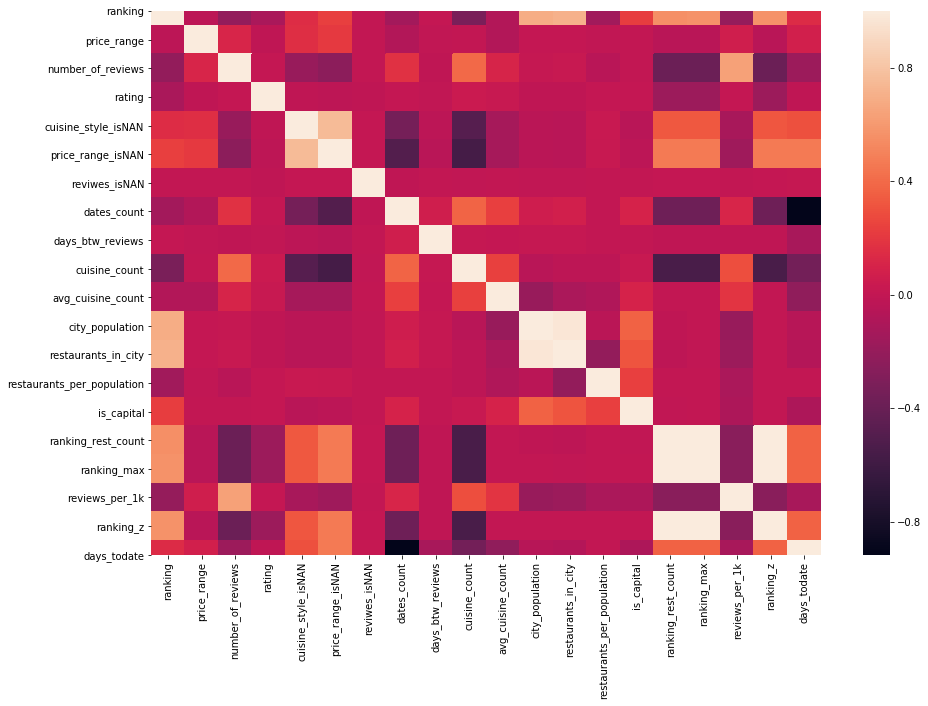

In [121]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

In [122]:
# выведем в виде таблицы самые скоррелированные признаки (+/-)
abs_corr = data.drop(['sample'], axis=1).corr().abs()

abs_corr = abs_corr.stack().reset_index()
abs_corr.columns = ['feature_1','feature_2','corr']
mask_dups = (abs_corr[['feature_1', 'feature_2']].apply(frozenset, axis=1).duplicated()) | (abs_corr['feature_1']==abs_corr['feature_2']) 
abs_corr = abs_corr[~mask_dups]
filt_corr = abs_corr[abs_corr['corr'] > 0.75]
print(filt_corr)

# выведем все из feature_1 в отдельный список, чтобы удалить:
abs_corr_list = filt_corr['feature_1'].tolist()

               feature_1            feature_2      corr
85   cuisine_style_isNAN    price_range_isNAN  0.753183
159          dates_count          days_todate  0.916285
232      city_population  restaurants_in_city  0.974085
316   ranking_rest_count          ranking_max  0.999333
318   ranking_rest_count            ranking_z  0.999114
338          ranking_max            ranking_z  0.999784


## 4. Data Preprocessing

In [123]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    # ################### 1. Предобработка ############################################################## 
    df_output = df_input.copy()
    df_output = df_output.drop(['latest_date', 'earliest_date'], axis = 1)
    #df_output = df_output.drop(abs_corr_list, axis = 1)  # не удаляем признаки, так как МАЕ ухудшается
        
    # ################### 2. Encoding ############################################################## 
    df_output = pd.get_dummies(df_output, columns=['city'], dummy_na=True) 
    
    # ################### 3. Clean #################################################### 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

In [124]:
df_preproc = preproc_data(data)
df_preproc.sample(10)
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ranking                     50000 non-null  float64
 1   price_range                 50000 non-null  int64  
 2   number_of_reviews           50000 non-null  float64
 3   sample                      50000 non-null  int64  
 4   rating                      50000 non-null  float64
 5   cuisine_style_isNAN         50000 non-null  uint8  
 6   price_range_isNAN           50000 non-null  uint8  
 7   reviwes_isNAN               50000 non-null  uint8  
 8   dates_count                 50000 non-null  int64  
 9   days_btw_reviews            50000 non-null  int64  
 10  cuisine_count               50000 non-null  int64  
 11  avg_cuisine_count           50000 non-null  float64
 12  city_population             50000 non-null  int64  
 13  restaurants_in_city         500

In [125]:

# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values # наш таргет
X = train_data.drop(['rating'], axis=1)


Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [127]:
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 52), (40000, 52), (40000, 51), (32000, 51), (8000, 51))

# Model 
Сам ML

In [128]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [129]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [130]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s fini

In [131]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.201360625


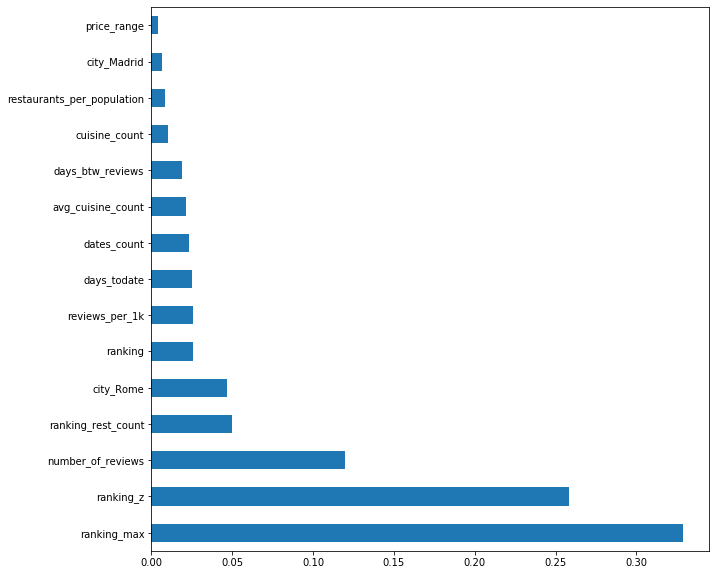

In [132]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [133]:
test_data.sample(10)

,ranking,price_range,number_of_reviews,rating,cuisine_style_isNAN,price_range_isNAN,reviwes_isNAN,dates_count,days_btw_reviews,cuisine_count,...,city_Oporto,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan
5693,693.0,1,205.000000,0.0,0,0,0,2,96,7,...,0,0,0,0,0,0,1,0,0,0
7187,9998.0,1,69.000000,0.0,0,0,0,2,52,5,...,0,0,1,0,0,0,0,0,0,0
9724,688.0,1,12.000000,0.0,1,1,0,2,14,1,...,0,0,0,0,0,0,0,0,0,0
3373,9098.0,1,2.000000,0.0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7099,2655.0,1,77.000000,0.0,0,0,0,2,139,3,...,0,0,1,0,0,0,0,0,0,0
1190,808.0,1,498.000000,0.0,0,0,0,2,6,5,...,0,0,0,0,0,0,0,0,0,0
1269,3187.0,1,195.000000,0.0,0,0,0,2,42,4,...,0,0,1,0,0,0,0,0,0,0
6650,3213.0,1,148.744436,0.0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
7174,1437.0,0,63.000000,0.0,0,0,0,2,43,4,...,0,0,0,0,0,0,0,0,1,0
7587,740.0,1,254.000000,0.0,0,0,0,2,60,7,...,0,0,0,0,0,0,0,0,0,0


In [134]:
test_data = test_data.drop(['rating'], axis=1)

In [135]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [136]:
predict_submission = model.predict(test_data)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [137]:
predict_submission

array([3.14 , 4.265, 4.535, ..., 3.135, 4.475, 4.31 ])

In [138]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.140
1,id_1,4.265
2,id_2,4.535
3,id_3,4.280
4,id_4,4.460
5,id_5,4.430
6,id_6,1.360
7,id_7,2.785
8,id_8,4.135
9,id_9,4.705


In [182]:
import datetime as dt

In [183]:
df_pos_words = pd.read_csv('positive-words.txt',skiprows=34, names=['word'])
pos_words_list = df_pos_words['word'].to_list() 

In [185]:
pos_words_list

['admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordably',
 'afordable',
 'agile',
 'agilely',
 'agility',
 'agreeable',
 'agreeableness',
 'agreeably',
 'all-around',
 'alluring',
 'alluringly',
 'altruistic',
 'altruistically',
 'amaze',
 'amazed',
 'amazement',
 'amazes',
 'amazing',
 'amazingly',
 'ambitious',
 'ambitiously',
 'ameliorate',
 'amenable',
 'amenity',
 'amiability',
 'amiabily',
 'amiable',
 'amicability',
 'amicable',
 'amicably',
 'amity',
 'ample',
 'amply',
 'amuse',
 'amusing',
 'amusingly',
 'angel',
 'a

In [177]:
def createWordList(line):
    wordList2 =[]
    wordList1 = line.split()
    for word in wordList1:
        cleanWord = ""
        for char in word:
            if char in '!,.?":;0123456789':
                char = ""
            cleanWord += char
        wordList2.append(cleanWord.lower())
    return wordList2

In [178]:
def count_positive_words_proportion(reviews):
    '''
    Количество позитивных слов в приведенных отзывах
    '''
    pos_words_count = 0
    txts=get_reviews(reviews)['reviews_txt']
    txt = ' '.join(txts)
    #print(type(txt))
    words = createWordList(txt)
    
    words_count = len(words) if len(words) > 0 else 1
    words_count = 1
    pos_words_in_review=set(words).intersection(pos_words_list)
    for word in words:
        if word in pos_words_list:
            #print(word)
            pos_words_count +=1  
    return np.round(pos_words_count/words_count,2)

In [179]:
def list_positive_words(reviews): 
    '''
    Список уникальных позитивных слов в приведенных отзывах
    '''
    txts=get_reviews(reviews)['reviews_txt']
    txt = ' '.join(txts)
    #print(type(txt))
    words = createWordList(txt)
    
    words_count = len(words) if len(words) > 0 else 1
    words_count = 1
    pos_words_in_review=set(words).intersection(pos_words_list)
    #print(len(pos_words_in_review))
    if (len(pos_words_in_review) == 0):
        return np.NAN
    else:
        return list(pos_words_in_review)

In [180]:
def get_reviews(rev):
    '''
    Получаем review в виде:
    review['reviews_txt'][1] - list of reviews
    review['reviews_dt'][1] - list of reviews dates
    '''
    if  not pd.isna(rev): 
        rev = str(rev).replace("'",'"')
        rev = rev.replace('], [', '], "reviews_dt": [')
        rev = '{ "reviews_txt":' + rev + '}'
        rev = rev.replace('[[','[').replace(']]',']')
        d = json.loads(rev)

        d['reviews_dt'] = [dt.datetime.strptime(date, '%m/%d/%Y').date() if len(date.split('/')[2])==4 else dt.datetime.strptime(date, '%m/%d/%y').date() for date in d['reviews_dt']]
        return d
    else:
        return {}

In [181]:
data['positive_words'] = data['reviews'].apply(lambda x: count_positive_words_proportion(x))

JSONDecodeError: Expecting ',' delimiter: line 1 column 33 (char 32)